In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from timebudget import timebudget

from cplAE_MET.utils.load_config import load_config
from cplAE_MET.utils.dataset import MET_exc_inh

from cplAE_MET.models.subnetworks_M import AE_M
from cplAE_MET.models.subnetworks_E import AE_E
from cplAE_MET.models.subnetworks_ME import AE_ME_int
from cplAE_MET.models.subnetworks_T import AE_T
from cplAE_MET.models.torch_utils import MET_dataset, min_var_loss, add_noise, scale_depth, center_resize
from torch.utils.data import DataLoader
import torch.nn.functional as F
from cplAE_MET.utils.plots import plot_z, plot_m

/home/fahimehb/miniconda3/envs/cplae_met/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dir_pth = load_config('config.toml')
dat = MET_exc_inh.from_file(dir_pth['MET_data'])

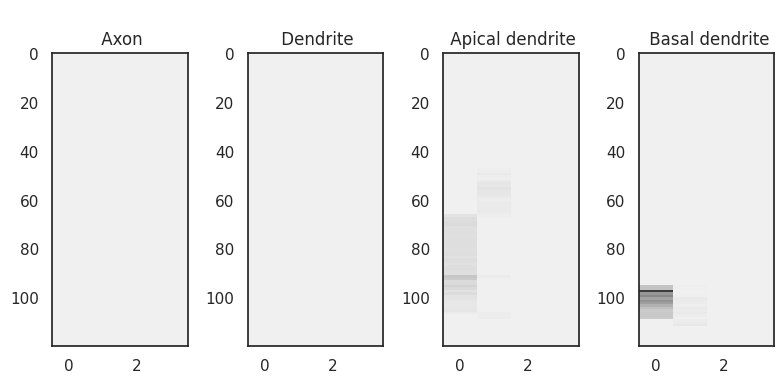

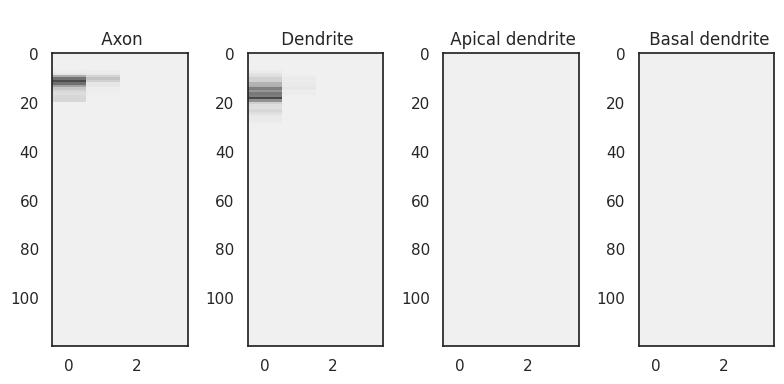

In [67]:
x= torch.unsqueeze(torch.tensor(dat.XM[dat.isM_1d][474:476, ...]), dim=1).double()
x = torch.nan_to_num(x)
plot_m(x[0, 0, ...].detach().cpu())
plot_m(x[1, 0, ...].detach().cpu())


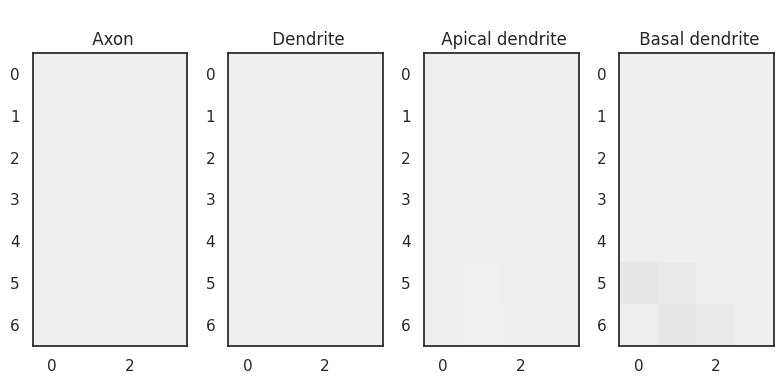

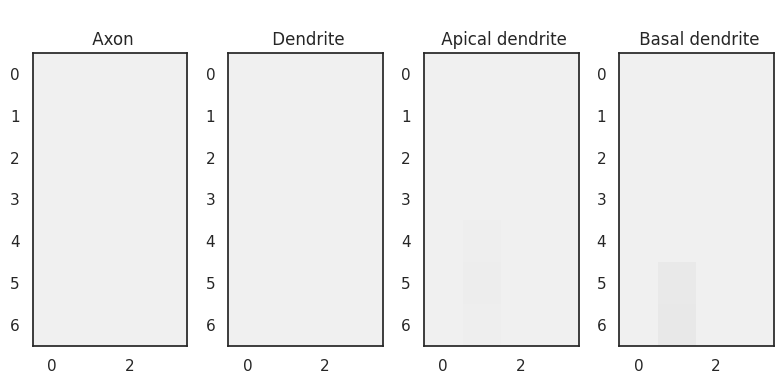

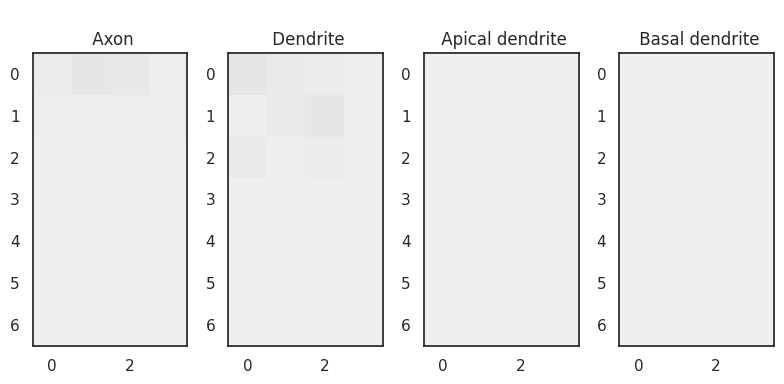

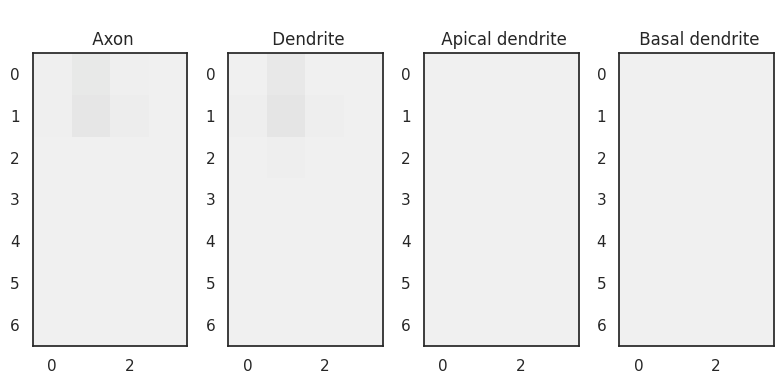

In [69]:
conv0 = nn.Conv3d(1, 2, (7, 3, 1), padding=(3, 1, 0)).double()
pool0 =  nn.MaxPool3d((4, 1, 1), return_indices=True)
conv1 = nn.Conv3d(2, 2, (7, 3, 1), padding=(3, 1, 0)).double()
pool1 =  nn.MaxPool3d((4, 1, 1), return_indices=True)
out, ind0 = pool0(conv0(x))
out, ind1  = pool1(conv1(out))
for i in range(2):
    plot_m(out[0, i, ...].detach().cpu())

for i in range(2):
    plot_m(out[1, i, ...].detach().cpu())
